Author: **Dario Riccardo Valenzano**  
Affiliation: Max Planck Institute for Biology of Ageing  
Check out the Valenzano Lab [website](http://valenzano-lab.age.mpg.de)  

general info about how to edit Markdown are [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


# A PRIMER FOR POPULATION GENETICS - COLOGNE, 23-27 May 2016

## Table of Contents
Day 1. [Basic Terms and Concepts in Population Genetics](#Basic Terms and Concepts in Population Genetics)  
Day 2. [Basic Metrics in Population Genetics](#Basic Metrics in Population Genetics)  
Day 3. [An in Silico Model to Simulate the Evolution of Biological Aging](http://biorxiv.org/content/early/2016/01/26/037952#An in Silico Model to Simulate the Evolution of Biological Aging)  

# 1. Basic Terms and Concepts in Population Genetics

- ### Genetic Drift

Genetic Drift is a concept that has to do with random sampling from populations of finite size and it is key to explain fundamental deviations of real populations from the Hardy Weinberg equilibrium. Drift can be a powerful force during evolution, as it leads to loss of diversity, which has to be counterbalanced (restored) by mutation. Drift-mutation balance has been thoroughly studied by theoretical population geneticists.

A python example of genetic drift from [here](http://web.stanford.edu/class/biosci113/Solutions/drift.py):

In [3]:
#!/usr/bin/env python -tO

'''A random genetic drift simulation.  This simulates a population in
which all alleles are initially different, and subsequent generations
are obtained through sampling with replacement.  A particular drift
simulation halts when one of the alleles fixes in the population.

This simulation treats both the haploid and diploid cases, and
demonstrates that, as far as this model is concerned, the diploid case
is the same as the haploid case with twice the population size.

'''

# drift.py
from random import choice
from math import sqrt

## auxiliary functions

def all_the_same(L):
    '''Return true if all elements in L identical (by state).'''
    ref = L[0]
    for x in L:
        if x != ref:
            return False
    return True

def sample_with_replacement(L):
    '''Sample len(L) individuals from L with replacment.'''
    return [choice(L) for x in L]

def mate(L):
    '''Sample len(L) diploid individuals with replacement.  An
    individual is represented as (x, y) where x and y are allelic
    states.  A new generation is produced by, len(L) times, picking two
    individuals at random with replacement, say (x, y) and (w, z), and
    picking one allele from each parent to form the child, e.g. (x,
    z).'''
    return [(choice(choice(L)), choice(choice(L))) for i in L]

def mean(L):
    return 1.0 * sum(L) / len(L)

def sd(L):
    m = mean(L)
    return sqrt(1.0 * sum([(x - m) ** 2 for x in L]) / len(L))

## haploid case
def haploid(N, show_pops):
    pop = range(1, N + 1) # = {1, 2, ..., populationsize}

    generations = 1
    while not all_the_same(pop):
        if show_pops:
            print pop
        pop = sample_with_replacement(pop)
        generations += 1
    if show_pops:
        print pop
    
    return generations

## diploid case
def diploid(N, show_pops):
    pop = [(i, N + i) for i in range(1, N + 1)]

    generations = 1
    while not all_the_same(pop):
        if show_pops:
            print pop
        pop = mate(pop)
        generations += 1
    if show_pops:
        print pop
    
    return generations

def main():
    popsize = 18
    repetitions = 100
    ## if you switch the comment below, the populations are printed out
    show_populations = False
    #show_populations = True

    times_to_fixation = [haploid(popsize, show_populations)
                         for i in range(repetitions)]
    print 'Haploid Case (N alleles):'
    print ' mean: %.2f	sd: %.2f' % \
          (mean(times_to_fixation), sd(times_to_fixation))

    times_to_fixation = [haploid(2 * popsize, show_populations)
                         for i in range(repetitions)]
    print 'Haploid Case (2N alleles):'
    print ' mean: %.2f	sd: %.2f' % \
          (mean(times_to_fixation), sd(times_to_fixation))

    times_to_fixation = [diploid(popsize, show_populations)
                         for i in range(repetitions)]
    print 'Diploid Case (N individuals, 2N alleles):'
    print ' mean: %.2f	sd: %.2f' % \
          (mean(times_to_fixation), sd(times_to_fixation))
    
if __name__ == '__main__':
    main()

Haploid Case (N alleles):
 mean: 32.50	sd: 18.17
Haploid Case (2N alleles):
 mean: 68.24	sd: 37.78
Diploid Case (N individuals, 2N alleles):
 mean: 64.64	sd: 33.89


Another example of genetic drift, including its graphical representation (written by Dario)  
First, set the initial conditions

In [2]:
import random

Legend:  
N = drifted population size  
p = starting frequency of major allele 'A'  
q = 1-p starting frequency of minor allele 'a'  
t = number of generations  
n = size of large population to sample from  

In [3]:
def drift(p, n, N): #This first function drifts the population once
    q = 1-p
    np_ = int(n*p)
    nq_ = int(n*q)
    P_ = ('A,'*np_ + 'a,'*nq_).split(',')[:-1]
    pp = random.sample(P_, 2*N)
    A = float(pp.count('A'))/(2*N)
    a = float(pp.count('a'))/(2*N)
    return A

In [1]:
def loop(p, n, N, t): #This function loops the drift function as many times as indicated bt 't' 
    i = 0
    ls = []
    while i < t:
        ls.append(drift(p, n, N))
        p = ls[i] #properly modified following insightful suggestion of Corinna
        i += 1
    return ls

Below, five simulations of drift sampling populations of 20 individuals each time, over 100 generations  
Basic graphical functions [here](http://kestrel.nmt.edu/~raymond/software/python_notes/paper004.html)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ls = [] # define an empty list
for i in range(5): # here you can choose how many simulations to run in parallel
    ls.append(loop(0.5, 1000000, 20, 100)) # which is looping starting from p = 0.5, n = 1 million, N = 20 and t = 100

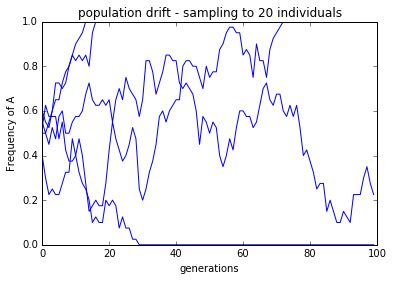

In [7]:
# Plotting parameters
x = range(100)
l0 = plt.plot(x,ls[0],'b-')
l1 = plt.plot(x,ls[1],'b-')
l2 = plt.plot(x,ls[2],'b-')
l3 = plt.plot(x,ls[3],'b-')
l4 = plt.plot(x,ls[4],'b-')
#ll = plt.legend(loc='upper left')
lx = plt.xlabel('generations')
ly = plt.ylabel('Frequency of A')
ttl = plt.title('population drift - sampling to 20 individuals')
plt.show()

Below, five simulations of drift sampling populations of 100 individuals each time, over 100 generations

In [21]:
lz = []
for i in range(5):
    lz.append(loop(0.5, 1000000, 100, 100))

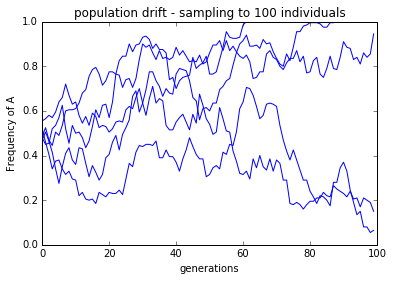

In [22]:
x = range(100)
l0 = plt.plot(x,lz[0],'b-')
l1 = plt.plot(x,lz[1],'b-')
l2 = plt.plot(x,lz[2],'b-')
l3 = plt.plot(x,lz[3],'b-')
l4 = plt.plot(x,lz[4],'b-')
#ll = plt.legend(loc='upper left')
lx = plt.xlabel('generations')
ly = plt.ylabel('Frequency of A')
ttl = plt.title('population drift - sampling to 100 individuals')
plt.show()

The two examples above show how drift, alone, can lead to severe allelic shifts, and that this shift is more rapid if the sampled population is small.
You are encouraged to play with the code and try to generate novel plots to understand how population size affects allele persistance.  

- ### Molecular Evolution 

$\rho$ is the rate of substitution   

u is the mutation rate to neutral alleles

For example, between *Drosophila melanogaster* and *Drosophila erecta* there are 36 substitutions in a genomic region of 768 nucleotides. Then we have:  

$\rho =  \frac{36}{2*23,000,000*768} = 10^{-09}$  

Surprisingly, in general $\rho$ = u

- **Derivation:**
Each generation, 2Nu new mutations enter the population. Larger populations will have more mutations, as u is fixed.  
The fraction of mutations that - on average - will neutrally fix is $\frac{1}{2N}$. This is due to the fact that the chance that any particular allele will fix in a population is equal to its frequency, which is $\frac{1}{2N}$ for a new mutation.  
Thus, the average rate of substitution, $\rho$, is $2Nu * \frac{1}{2N}$ or  
$\rho = u$

This means that the rate of substitution of neutral alleles is equal to the neutral mutation rate. 
**Although the strength of genetic drift depends on the population size, the rate of substitution does not**. This is due to the fact that the number of mutations entering the population each generation also depends on population size and cancels out drift's dependency on population size when deriving the rate of substitution.

- ### Positive Selection

How much selection is there out there?    

Bad mutations are highly frequent.   

Very bad dominant mutations are wiped out by the population e.g. at conception.  
Bad mutations that are recessive stick around a bit longer in the population, as it's very hard to get rid of them when they are at low frequency. For example, if a deleterious mutation has 1% frequency in the population, only 1 out of 10000 individuals will suffer from its effect (0.01^2).  

> **Extra credit:** *Can you calculate (analytical method) or simulate (numerical method) how many generations would it take on average for an allele that has 5% fitness advantage to reach 50% frequency starting as a het in 1 individual in a population of a thousand individuals?*  

Positive selection has to do with the increase in frequency of alleles associated with an advantageous fitness effect, i.e. beneficial alleles will *sweep* in the population at high frequency. 
Classically, positive selection refers to novel advantageous alleles increasing in frequency in the population. However, recent literature has challenged this view, and positive selection might be more often associated with alleles already present in the population - from standing genetic variation - providing a fitness (phenotypic) advantage in a novel environment. For instance, the alleles associated with human **lactase tolerance** increased in frequency after the development of agriculture in the neolithic.  

Positive selection is often studied in its classical **hard sweep** version, where an allele arising in a specific haplotype goes to rapid fixation (i.e. increases in frequency until reaches homozygosity), bringing at high frequency the whole haplotype it belongs to. 

The recently developed concept of **soft sweep** [Hermisson and Pennings, 2005](http://www.ncbi.nlm.nih.gov/pubmed/15716498) has to do with the beneficial mutation occurring on different haplotypes, and increasing independently in frequency, resulting in non-complete fixation of a specific haplotype. From a coalescent (backwards) perspective, the beneficial mutation has more than one ancestor, from a forward-time perspective more than one allele increase in frequency in the population due to selection. 

The key parameter for the occurrence of hard and soft sweeps is believed to be the waiting time until the mutation arises in the population.  
Hard sweeps happen if  
$N_e\mu_{adv} \ll 1$  
i.e. if the per-generation number of adaptive mutations is very low.   
 
For instance, if  
$N_e\mu_{adv} = 0.01$  
it means that it would take 100 generations until one adaptive mutation will arise.  
In this case, a hard sweep is expected to occur, and it will take a very long time before the next advantageous mutation will happen.   

On the contrary, soft sweeps are expected to happen if  
$N_e\mu_{adv} \geq 1$. 

>You can check out this video by Stanford professor **Dmitri Petrov** that explains this very concept:  
  
<a href="https://youtu.be/rOCFBunVa9A?t=5m15s" target="_blank"><img src="http://img.youtube.com/vi/rOCFBunVa9A/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>

> The amount of neutral polymorphism in the population, which is a function of the rate of coalescence of different alleles in the population, has been used to measure effective population size. However, this can be misleading, since population bottlenecks can dramatically affect the rate of coalescence. Despite large population size, even remote bottlenecks bias population size estimates. The time to coalescence (inversely proportional to population size) will indeed be proportional to the time to a bottleneck. On the one hand, rapid adaptations measures current events, whereas neutral polymorphism gives a measure of bottlenecks that happened in the past. These two measures (i.e. measures of adaptation and population size) refer to two different time scales. Neutral diversity can therefore be a serious underestimate of current (actual) population size.  

To provide an example of how we might have been underestimating population size, suffices to mention that $N_e$ in humans is calculated to be 20000.

In hard sweeps we expect 
* Dips in neutral diversity  
* Excess of low-frequency SNPs 
* One frequent long haplotype 

In soft sweeps we expect
* Potentially high diversity
* SNP frequencies not skewed
* Several frequent haplotypes

Metrics that measure haplotype homozygosity can therefore effectively detect soft sweeps [Garud et al. 2015](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/http://petrov.stanford.edu/pdfs/0110.pdf).  

Positive selection is a fast process, which increases the frequency of a given haplotype associated with a beneficial trait, bringing to fixation large regions of genome in linkage disequilibrium with the advantageous mutation. 

- ### Purifying (Negative) Selection  
Deleterious mutations continuously emerge, but they get purged by purifying selection. Strong purifying selection maintains low genetic diversity at sites that cannot "afford" polymorphisms, since any new mutation would be detrimental. Housekeeping genes and genes that are important for basic biologicial functions (development, reproduction, sensory systems, immune system, etc.) are all under very strong purifying selection. Once selective pressure is relieved from genes controlling any of these functions, then they accumulate detrimental mutations, in a process named **relaxed purifying selection**. For example, organisms living in caves, such as the Mexican cave fish *Astyanax mexicanus* accumulate several deleterious mutations in genes controlling eye development and pigment syntesys, and often become blind and albino (e.g. [Hinaux et al., 2013](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0053553)). There are evidences suggesting that in the human genome genes involved in olfactory perception and proteasome underwent relaxed purifying selection [Somel et al., 2013](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3708504/).
As opposed to positive selection, negative selection is a long process, and in general lasts enough for recombination to reduce the linkage of neutral or deleterious mutations associated with the selected locus (however, see below background selection). 

- ### Genetic Draft (hitchhiking)
According to the neutral theory of molecular evolution, most mutations are deleteriour or neutral. Very few are adaptive. Deleterious mutations are removed from the gene pool by purifying selection, while neutral ones are subjected to the laws of genetic drift. When a neutral (or even deleterious) mutation goes to fixation due to linkage disequilibrium with a selected locus, we define this event as genetic draft. Genetic draft has important implications, since it is the reason why even neutral polymorphisms can reach fixation. Since recombination breaks the linkage between neutral (or deleterious) and selected loci, genetic draft is biologically important in regions with decreased recombination, such as the human Y chromosome.

- ### Background Selection
Another form of linked selection happens when neutral variation is lost due to linkage with a negative selected locus, i.e. there is a loss of genetic variation that might be mistaken as negative selection. Unlike genetic draft, where neutral variation are preserved (even fixed) due to hitchhiking with positively selected variants, background selection is associated with the loss of neutral variants due to linkage with a deleterious variant, purged by negative selection. The genetic diversity loss associated with background selection can be misinterpreted as a decrease in effective population.

- ### Balancing Selection
Balancing selection maintains advantageous diversity in populations and contributes to phenotypic diversity. Unlike positive and purifying selection, which result in population homogenization, balancing selection maintains allelic diversity and enhances genetic diversity in populations (cit. [Andrés, 2011](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/http://onlinelibrary.wiley.com/store/10.1002/9780470015902.a0022863/asset/a0022863.pdf?v=1&t=iohbqlmc&s=5c1491421fd24dd56dc50a6b3b315f1430f65a51)). Unlike neutral variation, balancing selection not only maintains high genetic diversity, but it also results in increased phenotypic diversity.  
Balancing selection is achieved through a set of mechanisms such as *overdominance*, where heterozygotes are more fit than any of the homozygotes. A classical example is the $\beta$-globin gene in groups suffering malaria. Each homozygte suffers either anemia or malaria, respectively, while the heterozygotes are protected by malaria. The high fitness of the heterozygotes maintains the mutant allele at high frequency.  
Another mechanism resulting in balancing selection is *frequency-dependent selection*, where the fitness associated with an allele changes with its frequency, like in the self-incompatibility system in plants, possibly the MHC system in vertebrates. Spatial and temporal differential fitness advantage of distinct alleles can also contribute to balancing selection. Finally, antagonistic pleiotropism can also contribute to balancing selection, in the case when one gene affects multiple phenotypes and one allele is more beneficial for one trait and less for the other. The final relative frequency of the alleles will depend on the fitness contribution of each allele. Balancing selection leaves a characteristic site frequency spectrum signature, as intermediate frequency alleles become more prevalent in the population . 

> **Exercise:** calculate the relationship between N and t during drift (no mutation), using the drift and loop functions from above

## 2. Basic Metrics and Tests in Population Genetics

- ### Measures of genetic diversity among individuals

Decay of heterozygosity  
Probability that two alleles randomly drawn from the gene pool are the same (drift only):   
  
$$G' = \frac{1}{2N} + (1 - \frac{1}{2N})G$$
  
where the first part corresponds to the probability that they both are copies of the same allele from the previous generation, and the second is the probability that they are not identical by direct descent, but are identical by state (G), which is the homozygosity value for the population.   
   
At equilibrium between mutation and drift, the probability that two alleles drawn from the population are the same is:  
  
$$G' = \frac{1}{1+4Nu}$$
   
Easily derived as follows:  
  
$$G^{m'} = (1-u)^2(\frac{1}{2N} + (1-\frac{1}{2N})G)$$  
  
given that u is very small and N can be pretty large, we can ignore $u^2$ and $\frac{u}{N}$, which leads us to   
  
$$G^{m'} \approx \frac{1}{2N} + (1 - \frac{1}{2N})G - 2uG$$  
  
Setting then H = 1 - G  
*(where H is heterozygosity, or the probability that two alleles drawn by the population will be different by state)*
  
$$H' \approx (1-\frac{1}{2N})H + 2u(1-H) $$
  
Then the change in H in a single generation is  
  
$$\Delta(H) =  -\frac{1}{2N}H + 2u(1-H)$$
  
Since at equilibrium $\Delta(H') = 0$, we derive that  
  
$$H_{eq} = \frac{4Nu}{1+4Nu}$$  
from which it derives that $$G_{eq} = \frac{1}{1+4Nu}$$  
  
The parameter 4Nu is also known as $\theta$, which determines the level of variation under the neutral model.   
As shown here, $\theta$ can be derived from the level of homozygosity (G). This derivation follows the approach taken by J.H. Gillespie in [Population Genetics. A concise guide](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/http://www.ib.usp.br/genevol/images/papers/gillespie.pdf).
  
A very important measure of genetic variation among individuals in a population is $\pi$, which is the average pairwise nucleotide difference among individual sequences, that is:  
  
$$\pi = \frac{\sum_{i,j=1}^{N}d_{i-j}}{\frac{N!}{2!(N-2)!}}$$  
  
The denominator computes all the possible pairs in a group of N sequences (n choose k, somehow markdown for jupyter does not display it properly, therefore I wrote it in the extensive form).   
  
Another important measure is $S$, which is the number of variable sites in a given sequence, for the whole population.   
For instance, in the following set of sequences:  

|Individual| Sequence       |
|:----:| :-------------: |
|1. | ATGTTACATACGTTGTAGAGCTCA |
|2. | ACG**A**TACATACGTTGTAGA**C**CTCA |
|3. | ACG**A**TACATACGTTGTAGAGCTCA |
|4. | ACGTTACATACGT**A**GTAGAGCTCA |
|5. | ACGTTACATACGT**A**GTAGAGCT**G**A |
|6. | ACGTTACATACGT**A**GTAGAGCT**G**A |  

$$\pi = \frac{2+1+1+2+2+1+3+4+4+2+3+3+1+1}{\frac{6!}{2!(6-2)!}} = 2 $$   
There are 4 segregating sites ($S = 4$)

- ### Tajima's D  

In a purely neutral population, there is an expectation for $\pi$ is related to $S$, and that expectation (under neutrality) is actually $\theta$.  
In other words $\pi$ is expected to be equal to $\theta$ under neutrality.   
**More formally, according to the neutral theory, $\pi$ and $\theta$ should be equivalent in a regimen of drift-mutation equilibrium.** 

In this respect, we (re)define $\theta$ as:
  
$$\theta = \frac{S}{\sum_{i=1}^{n-1}\frac{1}{i}}$$  
  
where n is the number of sequences that we're looking at.
  
How much $\pi$ (observed) is differing from $\theta$ (expected under neutrality) is indicated by **Tajima's D:**
  
$$T_{D} = \pi - \theta$$  
For the sequence above, $T_{D} = 1.75$, which means that the observed variation among individuals ($\pi$) is larger than the expected by neutral evolution, i.e. $\pi > \theta$. This is suggestive of a high level of average heterozygosity, suggestive of balancing selection or recent population contraction, where during population shrinkage most of the intermediate variation among individuals is lost.

>**Ongoing debate: recombination rate and $\pi$ are positively correlated.**   
This scenario has two possible explanations:   
- #### Frequent selective sweeps  
- #### Background selection (if adapative variation are extremely rare), which stands on the following facts:  
  1. Bad mutations are highly frequent  
  2. Once bad mutations happen, the whole allele will be doomed to decrease in frequency and eventually disappear (only the more common neutral variants are left)  
  3. The size of the regions that will disappear depends on recombination rate   

- ### dN/dS 

![Codon Code](http://www.buzzle.com/images/diagrams/rna-codon-chart.jpg)

Note that a lot mutations happening in intergenic regions, introns and pseudogenes have little phenotypic effect (neutral?).  
Note that several changes in the third position of a codon are synonymous (neutral?). 
Note that all the changes of the second position of each codon are non-synonymous. Non-synonymous changes are often times non-neutral.

> **Question**: if all mutations were to accumulate neutrally, which would be more likely to be more abundant, synonymous or non-synonymous mutations?

**The rate of accumulation of synonymous mutations can be used as "neutral mutation rate" to scale for mutation rate differences.**   

*dN* is the number of non-synonymous changes per non-synonymous site and *dS* is the number of synonymous changes per synonymous site.
  
I will use the same example shown by Mohammed Moor (see link to video below) in class 8-6:  

|| Sequence       |
|:----:| :-------------: |
|Sample 1. | ACT CCG GGG CCC |
|Sample 2. | AC**G** CCG GG**C** C**T**C |

||Position|
|:----:| :-------------: |
|Syn | 001 001 001 001 |
|Non-Syn | 110 110 110 110 |

||Syn|Non-Syn|
|:----|:----:|:-------------:|
|Sites | 4|8|
|Changes | 2|1|  
    
$$dN = 1/8$$  
$$dS = 2/4$$  
$$\frac{dN}{dS} = 0.25$$  

If all changes were neutral, we would expect *dN/dS* to be close to 1. This means no selection on non-synonymous changes.  
When *dN/dS* < 1 it means that non-synonymous changes have been constrained, there are fewer than expected by neutrality. With *dN/dS* > 1 is a strong indication for recent and powerful positive selection. This would mean that in one region there would be an accumulation of functional changes. Evolution of this type requires multiple aminoacid changes in a gene. 

> Try to calculate *dN/dS* for this sequence:

>|| Sequence (Aspm)      |
>|:----:| :-------------: |
>|Human | CGT GGC GCA CTT GTA |
>|Chimp | CGT CGC CCA CTT GTT |
  
> **Question:** does it matter where in the gene we calculate the *dN/dS* ratio?

*dN/dS* is a bit too conservative and generates a lot of false negatives. 

- ### The McDonald Kreitman Test (MKT)
This test still looks at synonymous and non-synonymous changes, but it does it within and between species. Additionally, it does not correct for synonymous and non-synonymous sites. The basic assumption is that the ratio between synonymous and non-synonymous changes between species should be constant across time.  
This is due to the following assumptions of the neutral theory:  

    1. Most of the non-deleterious non-synonymous changes are neutral  
    2. They arise at a constant rate  
    3. Since they are neutral, they fix at the same rate as the synonymous: 1/2N

|| Sequence       |
|:----:| :-------------: |
|Species1, ID 1. | CTT ACT TAT ACC CGT |
|Species1, ID 2. | CTG ACT TAT ACC CGT |
|Species1, ID 3. | CTG ACT TCT ACC CGT |
|Species1, ID 4. | CTG ACT TCT ACA CGT |

|| Sequence       |
|:----:| :-------------: |
|Species2, ID 1. | ATG ACC TCT ACC CGT |

||Fixed Btw|Polym Within|
|:----|:----:|:-------------:|
|Non-Syn | 1|1|
|Syn | 1|2|  
  
More generally,  

||Fixed Btw|Polym Within|
|:----|:----:|:-------------:|
|Non-Syn | A|B|
|Syn | C|D|  
  
Neutrality expects that *A/C = B/D*, i.e. the site equally accumulates neutral variants both within and between species. 
  
For example, 

|SENP1|Fixed Btw|Polym Within|
|:----|:----:|:-------------:|
|Non-Syn | 4|1|
|Syn | 1|5|
gene important for hypoxia  
4:1 >> 1:5, indicative of strong positive selection
  

|CIAS1|Fixed Btw|Polym Within|
|:----|:----:|:-------------:|
|Non-Syn | 5|1|
|Syn | 10|2|  
gene important for autoinflammatory response  
5:10 = 1:2, meeting the expectations for neutrality
  
What happens in this case?

|AGT|Fixed Btw|Polym Within|
|:----|:----:|:-------------:|
|Non-Syn | 1|3|
|Syn | 13|1|   
gene involved in hypertension and coronary heart disease    
1:13 << 3:1  
One possible explanation is the persistence of recessive bad alleles, another one is overdominance.

> Practice the MKT with the following sequences:  

>|| Sequence       |
>|:----:| :-------------: |
>|Human 1 | TCT CCT ACA GGG CGT CTA GTT|
>|Human 2 | TCT CCT ACA GGG CGT CTA GTT|
>|Human 3| TCT CCT ACT GGG CGT CTA ATT|
>|Human 4 | TCT CCT ACT GGG CGT CTA GTT |
>|Human 5| TCT CCT ACA GGG CGT CTA GTT|
>|Human 6 | TCT CAT ACA GGG CGT CTA GTT|

>|| Sequence       |
>|:----:| :-------------: |
>|Chimp 1 | TAT CCT ACA GGC CGT CTT GTT|

Many of these concepts are simply and clearly introduced in the "Introduction to Genetics and Evolution" class, by professor **Mohamed Noor**:   
   
<a href="https://www.youtube.com/watch?v=UeWU1yOz8lQ&list=PL4n6Uk3aii8iottl_J2OWrn-8RVveZWri" target="_blank"><img src="http://img.youtube.com/vi/UeWU1yOz8lQ/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>

## 3. [An in Silico Model to Simulate the Evolution of Biological Aging](http://biorxiv.org/content/early/2016/01/26/037952#An in Silico Model to Simulate the Evolution of Biological Aging) 